In [1]:
pip install  catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error as MSE, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [3]:
data = pd.read_csv("Specific_Heat_Capacity_Data.csv")

In [4]:
data.head()

,Compounds,PE_element_1,PE_element_2,PE_element_3,Convalent_Radius_element_1,Convalent_Radius_element_2,Convalent_Radius_element_3,FIE_element_1,FIE_element_2,FIE_element_3,Row_element_1,Row_element_2,Row_element_3,DirectBand_Gap,Indirect_Band_Gap,Specific Heat Capacity J/(kg K)
0,PbTiO3,1.87,1.54,3.44,131,136,73,715.6,658.8,1313.9,6,4,2,3.95,3.15,3404.0
1,BaNbO3,0.89,1.60,3.44,198,137,73,502.9,652.1,1313.9,6,5,2,0.31,0.09,3227.0
2,TlZnF3,1.62,1.65,3.98,148,131,71,589.4,906.4,1618.0,6,4,2,5.80,5.52,3020.0
3,CsSnCl3,0.79,1.96,3.16,225,141,99,375.7,708.6,1251.2,6,5,3,1.57,1.57,1893.6
4,BaTiO3,0.89,1.54,3.44,198,136,73,502.9,658.8,1313.9,6,4,2,4.12,3.58,3482.0


In [5]:
## Check null values
data.shape

(199, 16)

In [6]:
NA = data.isna().sum()
print(NA)

Compounds                          0
PE_element_1                       0
PE_element_2                       0
PE_element_3                       0
Convalent_Radius_element_1         0
Convalent_Radius_element_2         0
Convalent_Radius_element_3         0
FIE_element_1                      0
FIE_element_2                      0
FIE_element_3                      0
Row_element_1                      0
Row_element_2                      0
Row_element_3                      0
DirectBand_Gap                     0
Indirect_Band_Gap                  0
Specific Heat Capacity J/(kg K)    0
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Compounds                        199 non-null    object 
 1   PE_element_1                     199 non-null    float64
 2   PE_element_2                     199 non-null    float64
 3   PE_element_3                     199 non-null    float64
 4   Convalent_Radius_element_1       199 non-null    int64  
 5   Convalent_Radius_element_2       199 non-null    int64  
 6   Convalent_Radius_element_3       199 non-null    int64  
 7   FIE_element_1                    199 non-null    float64
 8   FIE_element_2                    199 non-null    float64
 9   FIE_element_3                    199 non-null    float64
 10  Row_element_1                    199 non-null    int64  
 11  Row_element_2                    199 non-null    int64  
 12  Row_element_3         

## Feature Corrolation 

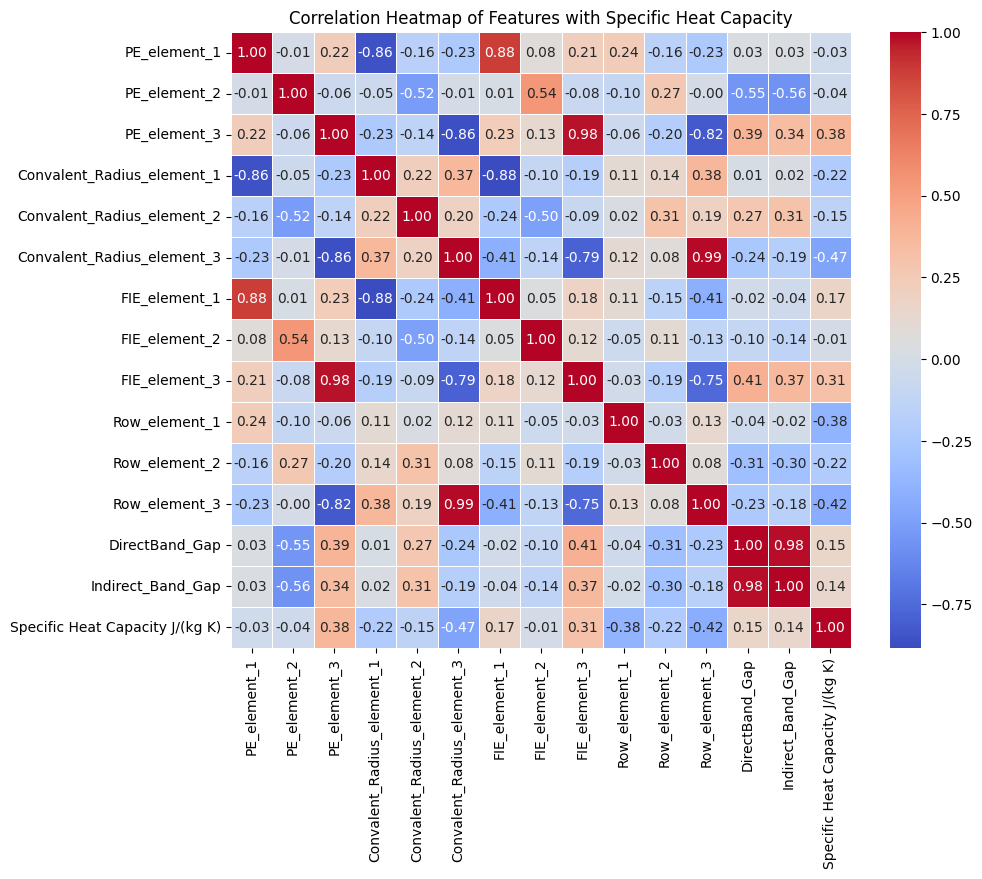

In [8]:
Feature_Importance = data.drop(columns=['Compounds']).corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Feature_Importance, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Specific Heat Capacity')
plt.show()

## We can now split the data accordingly

In [9]:
w_data = data.drop(columns=['Compounds'])

In [10]:
X = w_data.drop(columns=['Specific Heat Capacity J/(kg K)'])
y = w_data['Specific Heat Capacity J/(kg K)']

## 80:20 split

In [11]:
## Spliting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
## Check how the data is slitted

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (159, 14)
Shape of X_test = (40, 14)
Shape of y_train = (159,)
Shape of y_test = (40,)


Standardize our data 

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Initialize the models I want to fit

In [14]:
Seed = 42

In [15]:
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state = Seed),
    "Random Forest": RandomForestRegressor(random_state = Seed),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(random_state = Seed),
    "Extra Trees": ExtraTreesRegressor(random_state = Seed)
}

In [16]:
model_results = {}

In [17]:
import time

start = time.time()
for name, model in models.items():
    

    model.fit(X_train_scaled, y_train)

    
    # working on the test set
    y_pred = model.predict(X_test_scaled)
    mse = MSE(y_test, y_pred)
    rmsq = (mse)**(1/2)
    r2_test = r2_score(y_test, y_pred)

    # Working in the training set
    y_pred_rf = model.predict(X_train_scaled)
    train_mse = MSE(y_train, y_pred_rf)
    train_rmsqr= train_mse**(1/2)
    train_r2  = r2_score(y_train, y_pred_rf)

    
    model_results[name] = {
        "train_rmse": train_rmsqr,
        "train_R2": train_r2,
        "test_rmse": rmsq,
        "test_R2": r2_test
    }
end = time.time()


# Display the results
results_df = pd.DataFrame(model_results).T
results_df.sort_values(by="test_R2", ascending=False, inplace=True)
print(results_df)
# print(f"Time to execute code = {end - start}")


Learning rate set to 0.03062
0:	learn: 707.8516951	total: 51.7ms	remaining: 51.7s
1:	learn: 697.0814691	total: 53.5ms	remaining: 26.7s
2:	learn: 685.0599501	total: 55ms	remaining: 18.3s
3:	learn: 673.7026689	total: 56.1ms	remaining: 14s
4:	learn: 661.9327440	total: 57.2ms	remaining: 11.4s
5:	learn: 652.2903304	total: 58.3ms	remaining: 9.65s
6:	learn: 644.0277190	total: 59.3ms	remaining: 8.41s
7:	learn: 635.5871626	total: 60.3ms	remaining: 7.47s
8:	learn: 628.2187201	total: 61.2ms	remaining: 6.74s
9:	learn: 618.8801236	total: 62.2ms	remaining: 6.15s
10:	learn: 613.4710923	total: 63.2ms	remaining: 5.68s
11:	learn: 607.3176534	total: 64.2ms	remaining: 5.29s
12:	learn: 598.4740048	total: 65.1ms	remaining: 4.94s
13:	learn: 589.7250369	total: 66.1ms	remaining: 4.66s
14:	learn: 583.6190678	total: 66.8ms	remaining: 4.38s
15:	learn: 576.7203329	total: 67.8ms	remaining: 4.17s
16:	learn: 569.7085964	total: 68.8ms	remaining: 3.98s
17:	learn: 561.1175825	total: 69.6ms	remaining: 3.8s
18:	learn: 553

In [19]:
results_df

,train_rmse,train_R2,test_rmse,test_R2
CatBoost,9.031626,0.999843,243.265281,0.879719
Random Forest,123.298057,0.970742,272.823696,0.848713
Extra Trees,0.013223,1.000000,282.151124,0.838191
Gradient Boosting,29.885693,0.998281,286.559777,0.833095
XGBoost,0.152639,1.000000,297.157101,0.820522
Linear Regression,427.187216,0.648786,499.159323,0.493573


## 90:10 split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state = Seed),
    "Random Forest": RandomForestRegressor(random_state = Seed),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(),
     "CatBoost": CatBoostRegressor(random_state = Seed),
    "Extra Trees": ExtraTreesRegressor(random_state = Seed)
}

In [20]:
for name, model in models.items():
    
    model.fit(X_train_scaled, y_train)

    
    # working on the test set
    y_pred = model.predict(X_test_scaled)
    mse = MSE(y_test, y_pred)
    rmsq = (mse)**(1/2)
    r2_test = r2_score(y_test, y_pred)

    # Working in the training set
    y_pred_rf = model.predict(X_train_scaled)
    train_mse = MSE(y_train, y_pred_rf)
    train_rmsqr= train_mse**(1/2)
    train_r2  = r2_score(y_train, y_pred_rf)

    
    model_results[name] = {
        "train_rmse": train_rmsqr,
        "train_R2": train_r2,
        "test_rmse": rmsq,
        "test_R2": r2_test
    }
end = time.time()


# Display the results
results_df = pd.DataFrame(model_results).T
results_df.sort_values(by="test_R2", ascending=False, inplace=True)
print(results_df)
print(f"Time to execute code = {end - start}")


Learning rate set to 0.031198
0:	learn: 713.0127153	total: 410us	remaining: 410ms
1:	learn: 701.4977974	total: 696us	remaining: 348ms
2:	learn: 689.4418118	total: 977us	remaining: 325ms
3:	learn: 677.4406131	total: 1.27ms	remaining: 316ms
4:	learn: 665.1165267	total: 1.54ms	remaining: 307ms
5:	learn: 655.7265131	total: 1.91ms	remaining: 316ms
6:	learn: 645.3484192	total: 2.17ms	remaining: 308ms
7:	learn: 633.7325975	total: 2.46ms	remaining: 305ms
8:	learn: 623.3751055	total: 2.72ms	remaining: 300ms
9:	learn: 612.8084275	total: 3.03ms	remaining: 300ms
10:	learn: 607.5063386	total: 3.31ms	remaining: 298ms
11:	learn: 598.8607324	total: 3.56ms	remaining: 293ms
12:	learn: 591.9619308	total: 3.86ms	remaining: 293ms
13:	learn: 584.2476601	total: 4.15ms	remaining: 292ms
14:	learn: 575.7234348	total: 4.41ms	remaining: 289ms
15:	learn: 565.8663136	total: 4.68ms	remaining: 288ms
16:	learn: 555.0925332	total: 4.91ms	remaining: 284ms
17:	learn: 546.3780704	total: 5.14ms	remaining: 281ms
18:	learn: 

## 95:5 split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state = Seed),
    "Random Forest": RandomForestRegressor(random_state = Seed),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(),
     "CatBoost": CatBoostRegressor(random_state = Seed),
    "Extra Trees": ExtraTreesRegressor(random_state = Seed)
}

In [25]:
for name, model in models.items():
    
  
    model.fit(X_train_scaled, y_train)

    
    # working on the test set
    y_pred = model.predict(X_test_scaled)
    mse = MSE(y_test, y_pred)
    rmsq = (mse)**(1/2)
    r2_test = r2_score(y_test, y_pred)

    # Working in the training set
    y_pred_rf = model.predict(X_train_scaled)
    train_mse = MSE(y_train, y_pred_rf)
    train_rmsqr= train_mse**(1/2)
    train_r2  = r2_score(y_train, y_pred_rf)

    
    model_results[name] = {
        "train_rmse": train_rmsqr,
        "train_R2": train_r2,
        "test_rmse": rmsq,
        "test_R2": r2_test
    }
end = time.time()


# Display the results
results_df = pd.DataFrame(model_results).T
results_df.sort_values(by="test_R2", ascending=False, inplace=True)
print(results_df)
print(f"Time to execute code = {end - start}")


Learning rate set to 0.031467
0:	learn: 711.6212635	total: 512us	remaining: 512ms
1:	learn: 699.8068178	total: 769us	remaining: 384ms
2:	learn: 687.6534700	total: 1.02ms	remaining: 341ms
3:	learn: 676.2587535	total: 1.28ms	remaining: 319ms
4:	learn: 663.6808317	total: 1.53ms	remaining: 304ms
5:	learn: 654.6517824	total: 1.79ms	remaining: 296ms
6:	learn: 644.7584694	total: 2.01ms	remaining: 285ms
7:	learn: 631.9382859	total: 2.25ms	remaining: 280ms
8:	learn: 621.2470658	total: 2.57ms	remaining: 283ms
9:	learn: 611.6747934	total: 2.79ms	remaining: 277ms
10:	learn: 605.8897067	total: 3.04ms	remaining: 273ms
11:	learn: 597.6920313	total: 3.34ms	remaining: 275ms
12:	learn: 590.5214612	total: 3.6ms	remaining: 274ms
13:	learn: 582.9447318	total: 3.82ms	remaining: 269ms
14:	learn: 574.5020177	total: 4.04ms	remaining: 266ms
15:	learn: 564.2542658	total: 4.26ms	remaining: 262ms
16:	learn: 556.1335269	total: 4.49ms	remaining: 260ms
17:	learn: 547.2620209	total: 4.72ms	remaining: 257ms
18:	learn: 

## Do hyperparameter turning On XGBoost for 90:10 split

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
Xg_model = XGBRegressor()

In [ ]:
param_grid = {
    'eta': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.5],
    'lambda': [0.01, 0.1, 1],
    'alpha': [0, 0.1, 1]
}



grid_search = GridSearchCV(estimator=Xg_model, param_grid=param_grid, 
                           scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

In [ ]:
best_score = grid_search.best_score_

In [ ]:
print(f"Best R2 Score: {best_score}")


Because after turning we get a lower peformance we can use the evaluate ensemble of geeting the average of the two tuned and untuned

## Extract feature importance

In [29]:
Xg_model = XGBRegressor()
Cat_model = CatBoostRegressor(random_state = Seed)
Et_model = ExtraTreesRegressor(random_state = Seed)

In [30]:
Xg_model.fit(X_train_scaled, y_train)
Cat_model.fit(X_train_scaled, y_train)
Et_model.fit(X_train_scaled, y_train)

Learning rate set to 0.031198
0:	learn: 713.0127153	total: 419us	remaining: 419ms
1:	learn: 701.4977974	total: 666us	remaining: 333ms
2:	learn: 689.4418118	total: 892us	remaining: 297ms
3:	learn: 677.4406131	total: 1.12ms	remaining: 279ms
4:	learn: 665.1165267	total: 1.36ms	remaining: 270ms
5:	learn: 655.7265131	total: 1.59ms	remaining: 264ms
6:	learn: 645.3484192	total: 1.8ms	remaining: 256ms
7:	learn: 633.7325975	total: 2.01ms	remaining: 249ms
8:	learn: 623.3751055	total: 2.23ms	remaining: 245ms
9:	learn: 612.8084275	total: 2.42ms	remaining: 240ms
10:	learn: 607.5063386	total: 2.63ms	remaining: 237ms
11:	learn: 598.8607324	total: 2.84ms	remaining: 234ms
12:	learn: 591.9619308	total: 3.03ms	remaining: 230ms
13:	learn: 584.2476601	total: 3.24ms	remaining: 228ms
14:	learn: 575.7234348	total: 3.45ms	remaining: 227ms
15:	learn: 565.8663136	total: 3.66ms	remaining: 225ms
16:	learn: 555.0925332	total: 3.87ms	remaining: 224ms
17:	learn: 546.3780704	total: 4.09ms	remaining: 223ms
18:	learn: 5

ExtraTreesRegressor(random_state=42)

In [31]:
Xg_Features = Xg_model.feature_importances_
Cat_Features = Cat_model.feature_importances_
Et_Features = Et_model.feature_importances_


## XGBoost Features importance

In [32]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Xg_Importance': Xg_Features
})

In [33]:
importance_df = importance_df.sort_values(by='Xg_Importance', ascending=False)

In [34]:
print(importance_df)

                       Feature  Xg_Importance
5   Convalent_Radius_element_3       0.797900
3   Convalent_Radius_element_1       0.063506
10               Row_element_2       0.052152
9                Row_element_1       0.050071
2                 PE_element_3       0.015877
1                 PE_element_2       0.005521
7                FIE_element_2       0.005239
12              DirectBand_Gap       0.002645
6                FIE_element_1       0.002524
0                 PE_element_1       0.002509
4   Convalent_Radius_element_2       0.001369
8                FIE_element_3       0.000423
13           Indirect_Band_Gap       0.000265
11               Row_element_3       0.000000


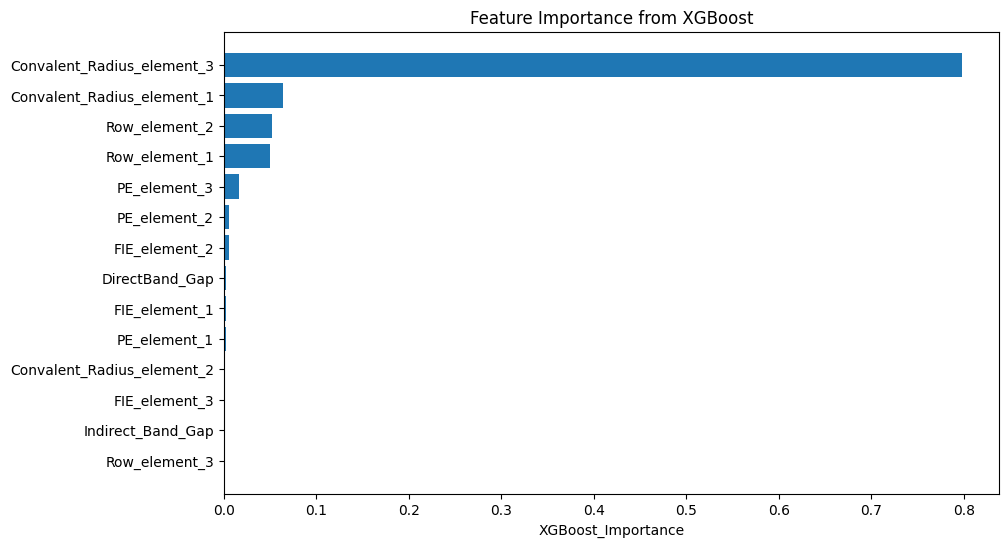

In [35]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Xg_Importance'])
plt.xlabel('XGBoost_Importance')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

## Feature importance from CatBoost

In [36]:
Cat_importance= pd.DataFrame({
    'Feature': X.columns,
    'Cat_Importance': Cat_Features
})

In [37]:
Cat_importance_df = Cat_importance.sort_values(by='Cat_Importance', ascending=False)

In [38]:
print(Cat_importance_df)

                       Feature  Cat_Importance
8                FIE_element_3       21.727224
11               Row_element_3       17.933717
5   Convalent_Radius_element_3       17.873399
2                 PE_element_3       14.551680
9                Row_element_1       10.618721
10               Row_element_2        4.255944
7                FIE_element_2        2.197144
3   Convalent_Radius_element_1        2.189814
13           Indirect_Band_Gap        1.857588
0                 PE_element_1        1.525212
4   Convalent_Radius_element_2        1.423265
6                FIE_element_1        1.357442
12              DirectBand_Gap        1.352507
1                 PE_element_2        1.136343


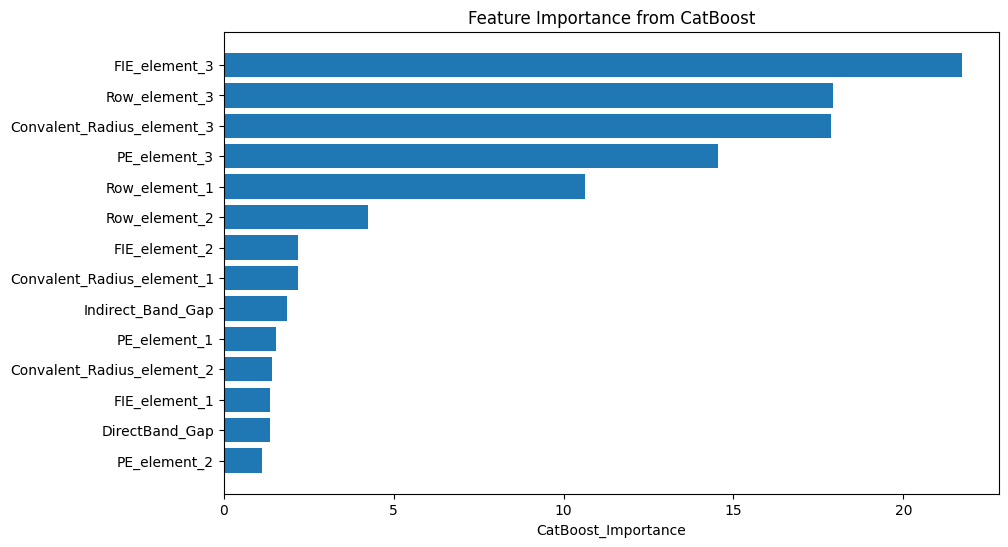

In [39]:
plt.figure(figsize=(10, 6))
plt.barh(Cat_importance_df['Feature'], Cat_importance_df['Cat_Importance'])
plt.xlabel('CatBoost_Importance')
plt.title('Feature Importance from CatBoost')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

## Feature Importance for Extra trees

In [40]:
Et_importance= pd.DataFrame({
    'Feature': X.columns,
    'Et_Importance': Et_Features
})

In [41]:
Et_importance_df = Et_importance.sort_values(by='Et_Importance', ascending=False)

In [42]:
print(Et_importance_df)

                       Feature  Et_Importance
5   Convalent_Radius_element_3       0.186160
2                 PE_element_3       0.167139
9                Row_element_1       0.166412
11               Row_element_3       0.148780
8                FIE_element_3       0.140343
10               Row_element_2       0.056183
3   Convalent_Radius_element_1       0.021767
13           Indirect_Band_Gap       0.019904
1                 PE_element_2       0.018715
0                 PE_element_1       0.017484
7                FIE_element_2       0.016850
12              DirectBand_Gap       0.015365
6                FIE_element_1       0.014161
4   Convalent_Radius_element_2       0.010736


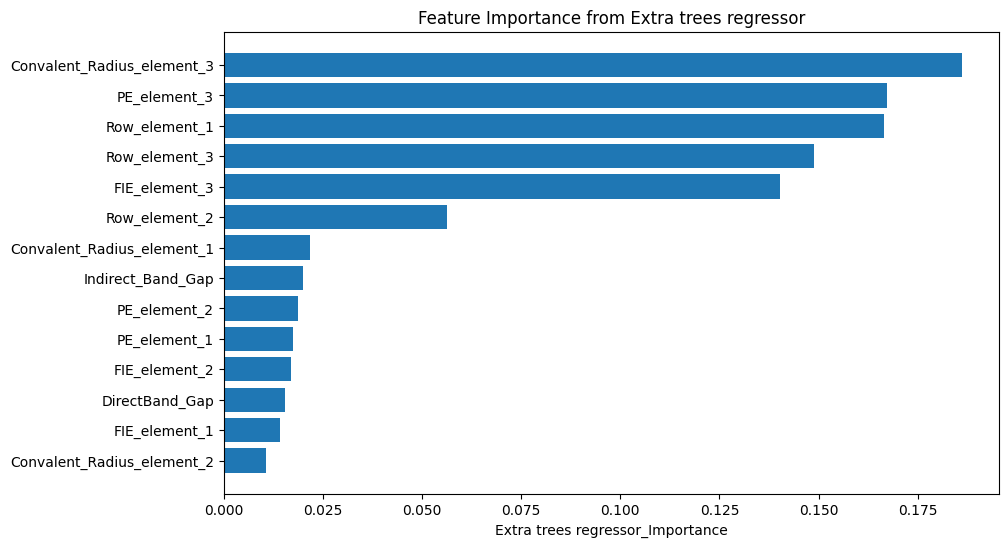

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(Et_importance_df['Feature'], Et_importance_df['Et_Importance'])
plt.xlabel('Extra trees regressor_Importance')
plt.title('Feature Importance from Extra trees regressor')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

## Model plots on test data

In [44]:
y_pred_XG = Xg_model.predict(X_test_scaled)
y_pred_Cat = Cat_model.predict(X_test_scaled)
y_pred_Et = Et_model.predict(X_test_scaled)

## XGBoost model

In [45]:
Xg_score = r2_score(y_test, y_pred_XG)
print(f'The score is {Xg_score}')

The score is 0.9788036175066264


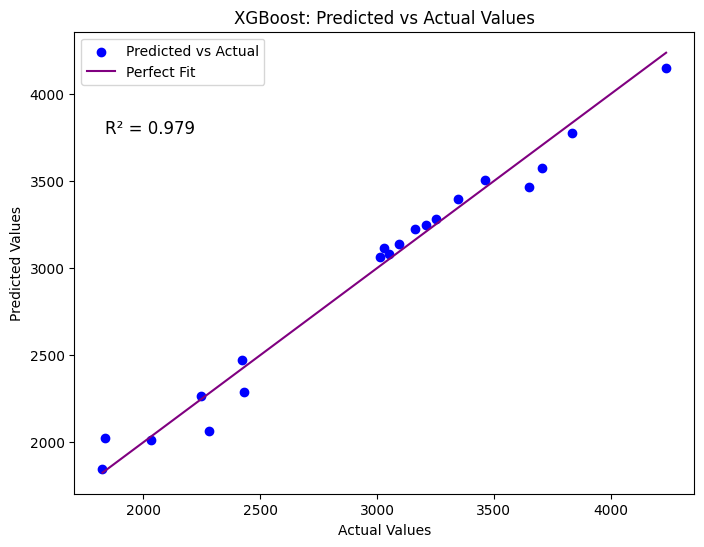

In [47]:
# Scatter plot to visualize the fit
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_XG, color='blue', label='Predicted vs Actual')

# Plot a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple',  label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Predicted vs Actual Values')
plt.text(0.05, 0.81,f'R² = {Xg_score:.3f}',fontsize=12, transform=plt.gca().transAxes, verticalalignment='top')
plt.legend()
plt.grid(False)
plt.show()


## CatBoost

In [48]:
Cat_score = r2_score(y_test, y_pred_Cat)
print(f'The score is {Cat_score}')

The score is 0.9764026875549325


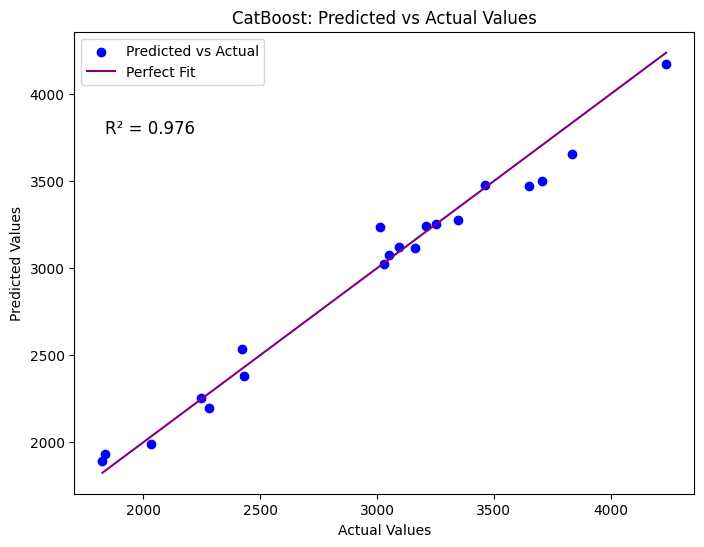

In [49]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_Cat, color='blue', label='Predicted vs Actual')

# Plot a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple',  label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CatBoost: Predicted vs Actual Values')
plt.text(0.05, 0.81,f'R² = {Cat_score:.3f}',fontsize=12, transform=plt.gca().transAxes, verticalalignment='top')
plt.legend()
plt.grid(False)
plt.show()


## Extra Tree Regressor

In [50]:
Et_score = r2_score(y_test, y_pred_Et)
print(f'The score is {Et_score}')

The score is 0.9681225503788176


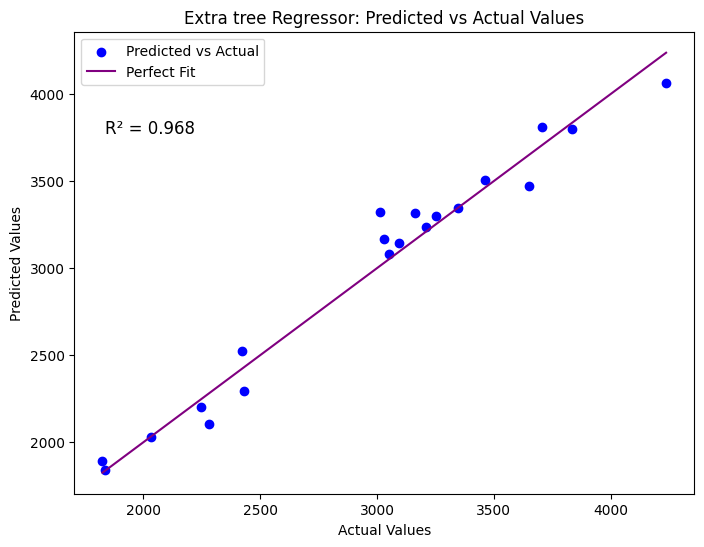

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_Et, color='blue', label='Predicted vs Actual')

# Plot a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple',  label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Extra tree Regressor: Predicted vs Actual Values')
plt.text(0.05, 0.81,f'R² = {Et_score:.3f}',fontsize=12, transform=plt.gca().transAxes, verticalalignment='top')
plt.legend()
plt.grid(False)
plt.show()

## Apply shap for explainable 

In [52]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [53]:
import shap

In [54]:
Explainer = shap.TreeExplainer(Xg_model)

In [55]:
shap_values = Explainer.shap_values(X_test_scaled)

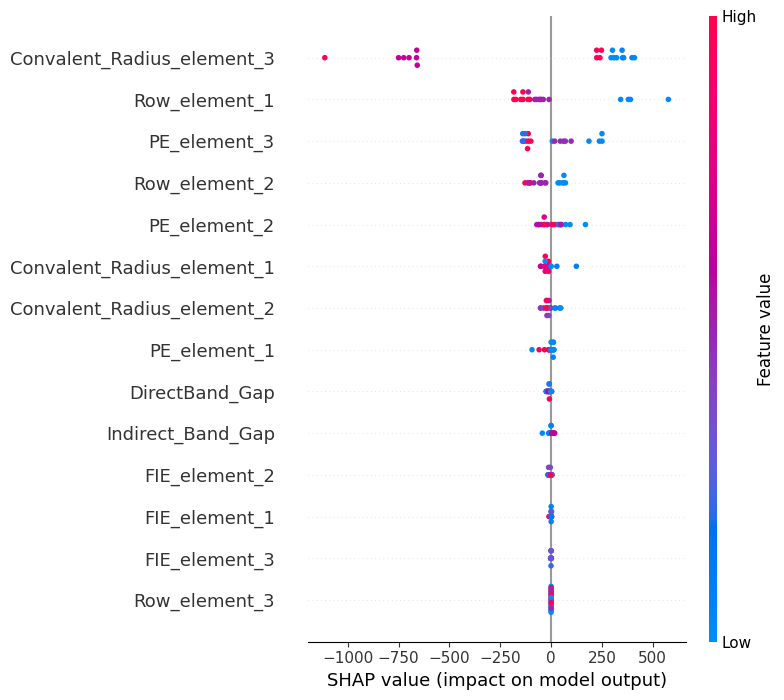

In [56]:
shap.summary_plot(shap_values, X_test)